# 1982-2022 NBA Player Statistics 
data obtained from [HERE](https://www.kaggle.com/datasets/robertsunderhaft/nba-player-season-statistics-with-mvp-win-share)

The goal with this data set is to predict player mvp and some analytical analysis on the players and teams.

In [46]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

In [87]:
data= pd.read_csv('./data_files/NBA_Dataset.csv')

In [88]:
data.head()

,Unnamed: 0,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,...,usg_pct,ows,dws,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share
0,0,1982,Kareem Abdul-Jabbar*,C,34,LAL,76,76.0,35.2,9.9,...,25.6,6.9,3.9,10.7,0.192,3.8,1.2,5.0,4.7,0.0
1,1,1982,Alvan Adams,C,27,PHO,79,75.0,30.3,6.4,...,22.8,2.5,4.7,7.2,0.144,1.4,2.2,3.6,3.4,0.0
2,2,1982,Mark Aguirre,SF,22,DAL,51,20.0,28.8,7.5,...,29.8,1.0,0.8,1.9,0.061,2.3,-1.6,0.7,1.0,0.0
3,3,1982,Danny Ainge,SG,22,BOS,53,1.0,10.6,1.5,...,21.5,-0.3,0.8,0.5,0.042,-3.7,1.0,-2.7,-0.1,0.0
4,4,1982,Tiny Archibald*,PG,33,BOS,68,51.0,31.9,4.5,...,17.9,3.4,1.8,5.2,0.115,1.4,-1.3,0.1,1.1,0.0


Award Share - The formula is (award points) / (maximum number of award points). For example, in the 2002-03 MVP voting Tim Duncan had 962 points out of a possible 1190. His MVP award share is 962 / 1190 = 0.81. [Referance](https://www.basketball-reference.com/about/glossary.html)

In [5]:
position_age = data.groupby('pos')['age'].mean().reset_index()

c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


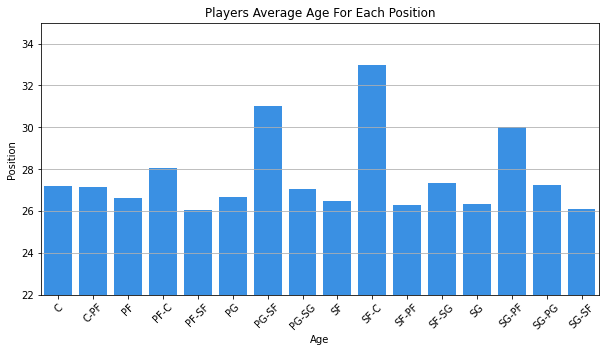

In [6]:
fig = plt.figure(figsize=(10,5))

sns.barplot(position_age['pos'], position_age['age'], color='dodgerblue')

plt.title("Players Average Age For Each Position")

plt.xlabel('Age')
plt.ylabel('Position')

plt.ylim(22,35)

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [8]:
team_fg_pct  = data.groupby('team_id')['fg_pct'].mean().reset_index()

c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


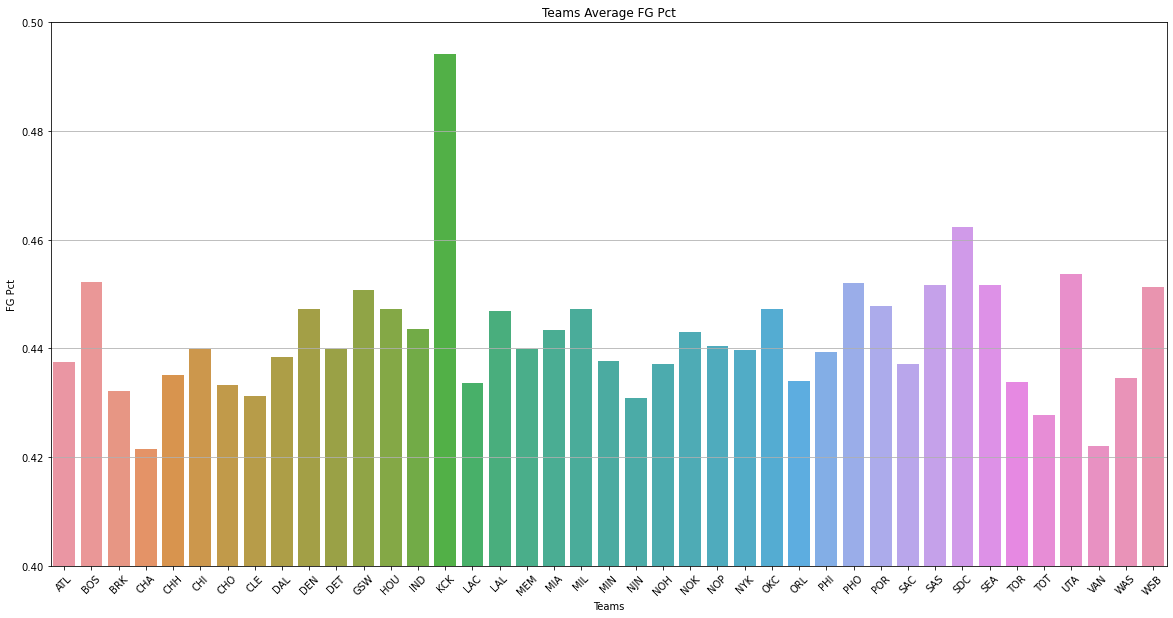

In [9]:
fig = plt.figure(figsize=(20,10))

sns.barplot(team_fg_pct['team_id'], team_fg_pct['fg_pct'])

plt.title("Teams Average FG Pct")

plt.xlabel('Teams')
plt.ylabel('FG Pct')

plt.ylim(.4, .5)


plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [122]:
season_22 = data[data['season'] == 2022]

In [123]:
team_fg_pct  = season_22 .groupby('team_id')['fg_pct'].mean().reset_index()

In [124]:
team_fg_pct

,team_id,fg_pct
0,ATL,0.435684
1,BOS,0.463400
2,BRK,0.470500
3,CHI,0.444056
4,CHO,0.428933
5,CLE,0.465789
6,DAL,0.399722
7,DEN,0.458471
8,DET,0.358500
9,GSW,0.471938


c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


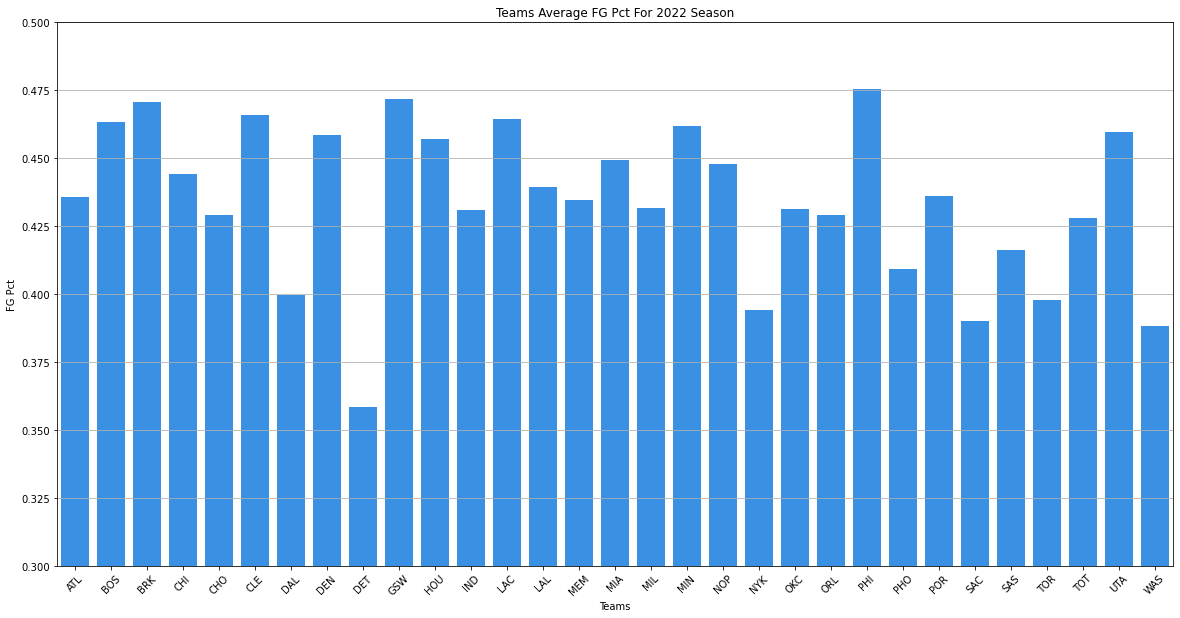

In [131]:
fig = plt.figure(figsize=(20,10))

sns.barplot(team_fg_pct['team_id'], team_fg_pct['fg_pct'], color='dodgerblue')

plt.title("Teams Average FG Pct For 2022 Season")

plt.xlabel('Teams')
plt.ylabel('FG Pct')

plt.ylim(.3, .5)


plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()